# TUGAS AKHIR SAINS DATA
## Analisis dan Prediksi Cuaca di Kota Bandung Menggunakan Machine Learning

###  Disusun oleh:
| No | Nama | NIM | Program Studi |
|----|---------------------------|------|--------------------|
| 1 | Herdin Kristianjani Zebua | 1227050053 | Teknik Informatika |
| 2 | Muhammad Rafli Haikal | (12270500 | Teknik Informatika |
| 3 | Imany Fauzy Rahman | 12270500 | Teknik Informatika |

**Universitas:** UIN Sunan Gunung Djati Bandung  
**Tahun:** 2025

---

### Latar Belakang
Cuaca merupakan salah satu faktor penting dalam kehidupan manusia, terutama di bidang pertanian, transportasi, dan kegiatan luar ruangan.  
Prediksi cuaca yang akurat dapat membantu masyarakat dan pemerintah dalam mengambil keputusan yang lebih baik.  

Pada proyek ini, dilakukan analisis data cuaca historis di **Kota Bandung** untuk memahami pola perubahan suhu, curah hujan, kelembapan, dan kecepatan angin, serta membangun model *Machine Learning* untuk memprediksi kemungkinan **hujan atau tidak hujan** berdasarkan parameter cuaca tersebut.

---

### Tujuan
1. Melakukan **analisis eksploratif (EDA)** terhadap data cuaca Kota Bandung.  
2. Membuat **model prediksi cuaca** menggunakan *Machine Learning*.  
3. Menyajikan hasil dalam bentuk **dashboard interaktif** menggunakan Streamlit.

---

### Dataset
Dataset yang digunakan merupakan data cuaca harian Kota Bandung yang memuat beberapa variabel utama:
- Tanggal  
- Suhu Minimum (°C)  
- Suhu Maksimum (°C)  
- Suhu Rata-rata (°C)  
- Kelembapan (%)  
- Kecepatan Angin Maksimum dan Rata-rata (m/s)  
- Curah Hujan (mm)  
- Arah Angin (derajat)

Dataset ini akan dianalisis dan dibersihkan untuk digunakan dalam proses pemodelan.

---

### Alur Proyek
1. **Import & Persiapan Data**  
2. **Pembersihan & Transformasi Data**  
3. **Analisis Eksploratif (EDA)**  
4. **Pembuatan Model Prediksi**  
5. **Pembuatan Dashboard Streamlit Interaktif**  
6. **Kesimpulan & Evaluasi**

---

### Teknologi yang Digunakan
- **Python** (pandas, numpy, scikit-learn, plotly)  
- **Streamlit** untuk visualisasi interaktif  
- **Ngrok** untuk publikasi dashboard di Google Colab  
- **Joblib** untuk menyimpan dan memuat model  
- **Matplotlib / Plotly** untuk visualisasi data

---

### Output Akhir
- Model prediksi hujan/tidak hujan.  
- Dashboard interaktif berbasis *Streamlit* dengan visualisasi:
- Tren suhu & curah hujan.  
- Diagram batang & lingkaran parameter cuaca.  
- Fitur input prediksi secara real-time.

      ---

      > 💡 *Notebook ini merupakan implementasi lengkap dari proses analisis data cuaca hingga pembuatan sistem prediksi berbasis machine learning dan visualisasi interaktif menggunakan Streamlit.*


## Tahap Data Understanding

Tahap ini bertujuan untuk memahami **struktur, sumber, dan karakteristik** data cuaca Bandung yang digunakan dalam analisis.

### 1. Sumber Data
Dataset diperoleh dari **Badan Meteorologi, Klimatologi, dan Geofisika (BMKG)** — Stasiun Klimatologi Bandung.  
Data diunduh dari portal resmi BMKG dalam format **Excel (.xlsx)** dengan nama file:  
`laporan_iklim_harian-251004023745.xlsx`.

### 2. Periode Data
Dataset mencakup **data iklim harian Kota Bandung** dalam rentang waktu **Januari 2019 hingga Oktober 2025**,  
dengan total sekitar **2.488 baris data** (tergantung kelengkapan setiap tahun).

### 3. Deskripsi Data
Beberapa atribut utama dalam dataset antara lain:
- **Tanggal** — waktu pencatatan data harian.  
- **Suhu Maksimum (°C)** — suhu tertinggi per hari.  
- **Suhu Minimum (°C)** — suhu terendah per hari.  
- **Suhu Rata-rata (°C)** — rata-rata suhu dalam sehari.  
- **Kelembapan (%)** — persentase kelembapan udara harian.  
- **Curah Hujan (mm)** — jumlah hujan yang turun per hari.  
- **Arah Angin** — arah dominan angin pada hari tersebut.  
- **Kecepatan Angin (m/s)** — kecepatan rata-rata angin.

### 4. Tujuan Tahap Ini
Pada tahap **Data Understanding**, dilakukan:
- Pembacaan dataset menggunakan `pandas`.  
- Pemeriksaan struktur data (`.info()` dan `.head()`).  
- Analisis awal seperti nilai kosong, tipe data, dan distribusi variabel.  
- Pemahaman konteks setiap fitur agar siap diproses pada tahap **Preprocessing** selanjutnya.

Tahap ini memastikan bahwa data BMKG Bandung sudah **relevan, lengkap, dan siap untuk diolah lebih lanjut**.


## Tahap Data Handling & Preprocessing

Pada tahap ini dilakukan proses pengolahan data agar siap digunakan untuk analisis dan pemodelan.  
Langkah-langkah utama yang dilakukan meliputi:

- **Pembersihan Data:** Menghapus nilai kosong dan duplikasi data.  
- **Penanganan Outlier:** Menggunakan metode *winsorizing* untuk menormalkan data ekstrem.  
- **Transformasi Data:** Melakukan normalisasi dan encoding variabel kategorikal.  
- **Feature Engineering:** Menambahkan fitur baru seperti selisih suhu dan kelembapan rata-rata.

Tahap ini memastikan dataset cuaca Bandung menjadi lebih terstruktur, bersih, dan siap digunakan pada tahap analisis.


In [ ]:
!pip install -q openpyxl scikit-learn

import pandas as pd, numpy as np, os, re
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

file_path = "/content/laporan_iklim_harian-251004023745.xlsx"

if not os.path.exists(file_path) and os.path.exists("/mnt/data/laporan_iklim_harian-251004023745.xlsx"):
    file_path = "/mnt/data/laporan_iklim_harian-251004023745.xlsx"

assert os.path.exists(file_path), f"File tidak ditemukan: {file_path}"

raw = pd.read_excel(file_path, header=None)
print("Raw shape:", raw.shape)
print("Tampilkan preview transposed (baris -> kolom) supaya header mudah dilihat:")
display(raw.head(12).T)

keywords = ["tanggal", "date", "tgl", "kota", "kabupaten", "suhu", "maks", "min", "curah", "hujan", "kelembab", "angin", "arah"]
detected_header = None
for i in range(min(12, raw.shape[0])):
    row_vals = raw.iloc[i].astype(str).str.lower().values
    score = sum(any(k in str(v) for k in keywords) for v in row_vals)
    if score >= 2:
        detected_header = i
        break
if detected_header is None:
    for i in range(min(12, raw.shape[0])):
        row_vals = raw.iloc[i].values
        non_numeric = sum(1 for v in row_vals if not pd.api.types.is_number(v) and pd.notnull(v) and str(v).strip() != '')
        if non_numeric >= max(2, int(0.5 * raw.shape[1])):
            detected_header = i
            break

print("Detected header row (0-based):", detected_header)
if detected_header is None:
    print("Jika detection salah, lihat preview di atas dan set header_row manual.")
    header_row = 0
else:
    header_row = detected_header

# --- 2) Read using the detected header row ---
df = pd.read_excel(file_path, header=header_row)
print("Loaded with header row =", header_row, "shape:", df.shape)
display(df.head(10))

# --- 3) Map BMKG columns to expected project variables ---
col_map = {
    "TANGGAL": "Tanggal",
    "TN": "Suhu Minimum",
    "TX": "Suhu Maksimum",
    "TAVG": "Suhu Rata-rata",
    "RH_AVG": "Kelembaban",
    "RR": "Curah Hujan",
    "SS": "SS",
    "FF_X": "Kecepatan Angin_Max",
    "FF_AVG": "Kecepatan Angin_Avg",
    "DDD_X": "Arah_Angin_deg",
    "DDD_CAR": "Arah Angin"
}
rename_dict = {k:v for k,v in col_map.items() if k in df.columns}
df = df.rename(columns=rename_dict)

# Add Kota/Kabupaten column if missing (we're focusing Bandung)
if "Kota/Kabupaten" not in df.columns:
    df["Kota/Kabupaten"] = "Bandung"

# Keep relevant cols (only if present)
keep_cols = ["Tanggal","Kota/Kabupaten","Suhu Maksimum","Suhu Minimum","Suhu Rata-rata",
             "Curah Hujan","Kelembaban","Kecepatan Angin_Max","Kecepatan Angin_Avg",
             "Arah_Angin_deg","Arah Angin","SS"]
keep_cols_present = [c for c in keep_cols if c in df.columns]
df = df[keep_cols_present].copy()

# --- 4) Convert types: Tanggal -> datetime, numeric cleanup ---
if "Tanggal" in df.columns:
    df["Tanggal"] = pd.to_datetime(df["Tanggal"], errors="coerce", dayfirst=True)

numeric_cols = [c for c in ["Suhu Maksimum","Suhu Minimum","Suhu Rata-rata","Curah Hujan",
                            "Kelembaban","Kecepatan Angin_Max","Kecepatan Angin_Avg","Arah_Angin_deg","SS"]
                if c in df.columns]
for col in numeric_cols:
    df[col] = df[col].astype(str).str.strip()
    df[col] = df[col].str.replace(",", ".", regex=False)
    df[col] = df[col].str.replace(r"[^0-9\.\-]", "", regex=True)
    df[col] = pd.to_numeric(df[col], errors="coerce")

print("Dtypes after conversion:")
print(df.dtypes)
display(df.head(8))

# --- 5) Missing summary ---
missing = pd.DataFrame({"missing_count": df.isnull().sum(),
                        "missing_percent": (df.isnull().sum()/len(df)*100).round(2)})
display(missing.sort_values("missing_count", ascending=False))

# --- 6) Fill missing values (default: numeric->median, categorical->mode) ---
cleaned = df.copy()
for col in numeric_cols:
    if col in cleaned.columns:
        cleaned[col] = cleaned[col].fillna(cleaned[col].median())

if "Arah Angin" in cleaned.columns:
    if not cleaned["Arah Angin"].mode().empty:
        cleaned["Arah Angin"] = cleaned["Arah Angin"].fillna(cleaned["Arah Angin"].mode().iloc[0])
    else:
        cleaned["Arah Angin"] = cleaned["Arah Angin"].fillna("Unknown")

# Drop rows with invalid Tanggal
if "Tanggal" in cleaned.columns:
    cleaned = cleaned[cleaned["Tanggal"].notnull()].reset_index(drop=True)

display(cleaned.head(8))

# --- 7) Outlier summary (IQR) and winsorize ---
outlier_summary = []
winsor = cleaned.copy()
for col in numeric_cols:
    if col in cleaned.columns:
        s = cleaned[col]
        q1 = s.quantile(0.25); q3 = s.quantile(0.75); iqr = q3-q1
        lower = q1 - 1.5*iqr; upper = q3 + 1.5*iqr
        n_out = int(((s < lower) | (s > upper)).sum())
        outlier_summary.append((col, n_out, float(lower), float(upper)))
        winsor[col] = s.clip(lower=lower, upper=upper)
outlier_df = pd.DataFrame(outlier_summary, columns=["column","num_outliers","lower_fence","upper_fence"]).sort_values("num_outliers", ascending=False)
display(outlier_df)

# --- 8) Feature engineering ---
fe = winsor.copy()
if all(x in fe.columns for x in ["Suhu Maksimum","Suhu Minimum"]):
    fe["Suhu_Rata_Calc"] = fe[["Suhu Maksimum","Suhu Minimum"]].mean(axis=1)
elif "Suhu Rata-rata" in fe.columns:
    fe["Suhu_Rata_Calc"] = fe["Suhu Rata-rata"]

if "Curah Hujan" in fe.columns:
    fe["Is_Rain"] = fe["Curah Hujan"] > 0.0

if "Tanggal" in fe.columns:
    fe = fe.sort_values("Tanggal").reset_index(drop=True)
    fe["Hari"] = fe["Tanggal"].dt.day_name()
    fe["Bulan"] = fe["Tanggal"].dt.month
    fe["Tahun"] = fe["Tanggal"].dt.year
    if "Suhu_Rata_Calc" in fe.columns:
        fe["Suhu_7d_mean"] = fe["Suhu_Rata_Calc"].rolling(window=7, min_periods=1).mean()
    if "Curah Hujan" in fe.columns:
        fe["Hujan_7d_sum"] = fe["Curah Hujan"].rolling(window=7, min_periods=1).sum()

def wind_category(s):
    try:
        if np.isnan(s): return "Unknown"
        s = float(s)
        if s <= 5: return "Calm"
        elif s <= 20: return "Breeze"
        else: return "Windy"
    except:
        return "Unknown"
if "Kecepatan Angin_Max" in fe.columns:
    fe["Wind_Category_Max"] = fe["Kecepatan Angin_Max"].apply(wind_category)
if "Kecepatan Angin_Avg" in fe.columns:
    fe["Wind_Category_Avg"] = fe["Kecepatan Angin_Avg"].apply(wind_category)

display(fe.head(8))

# --- 9) Save outputs (ubah path jika perlu) ---
out_dir = "/content" if os.path.exists("/content") else "/mnt/data"
mapped_fp = os.path.join(out_dir, "cuaca_bandung_mapped_raw.csv")
cleaned_fp = os.path.join(out_dir, "cuaca_bandung_mapped_cleaned.csv")
winsor_fp = os.path.join(out_dir, "cuaca_bandung_mapped_winsorized.csv")
fe_fp     = os.path.join(out_dir, "cuaca_bandung_mapped_feature_engineered.csv")

df.to_csv(mapped_fp, index=False)
cleaned.to_csv(cleaned_fp, index=False)
winsor.to_csv(winsor_fp, index=False)
fe.to_csv(fe_fp, index=False)

print("Saved files:")
print(" -", mapped_fp)
print(" -", cleaned_fp)
print(" -", winsor_fp)
print(" -", fe_fp)

Raw shape: (2488, 11)
Tampilkan preview transposed (baris -> kolom) supaya header mudah dilihat:


,0,1,2,3,4,5,6,7,8,9,10,11
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TANGGAL,01-01-2019,02-01-2019,03-01-2019,04-01-2019
1,ID WMO,NAMA STASIUN,LINTANG,BUJUR,ELEVASI,NaN,NaN,TN,21.8,20.8,20.7,20
2,: 96783,: Stasiun Geofisika Bandung,: -6.88356,: 107.59733,: 791 Meter,NaN,NaN,TX,28,31,30.6,30.8
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TAVG,23,24,24.1,24.2
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RH_AVG,79,74,76,69
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RR,0,13.5,0.8,0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SS,1.7,1.9,7.2,5.5
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FF_X,3,8,7,5
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DDD_X,280,250,260,210
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FF_AVG,2,4,4,3


Detected header row (0-based): 7
Loaded with header row = 7 shape: (2480, 11)


,TANGGAL,TN,TX,TAVG,RH_AVG,RR,SS,FF_X,DDD_X,FF_AVG,DDD_CAR
0,01-01-2019,21.8,28,23,79,0,1.7,3.0,280.0,2.0,W
1,02-01-2019,20.8,31,24,74,13.5,1.9,8.0,250.0,4.0,W
2,03-01-2019,20.7,30.6,24.1,76,0.8,7.2,7.0,260.0,4.0,W
3,04-01-2019,20,30.8,24.2,69,0,5.5,5.0,210.0,3.0,W
4,05-01-2019,20,31.7,24.8,70,0,8.5,5.0,300.0,3.0,C
5,06-01-2019,20.9,30.4,24.7,74,0,9,5.0,120.0,2.0,SE
6,07-01-2019,21.2,29.8,24.5,79,0,4.9,2.0,140.0,1.0,C
7,08-01-2019,21.2,29.6,23.8,84,32.2,3.5,4.0,270.0,1.0,C
8,09-01-2019,21.2,28.8,23.6,85,18.9,3.1,4.0,270.0,2.0,C
9,10-01-2019,20.2,29.2,23.7,82,5.1,4.7,5.0,120.0,1.0,C


Dtypes after conversion:
Tanggal                datetime64[ns]
Kota/Kabupaten                 object
Suhu Maksimum                 float64
Suhu Minimum                  float64
Suhu Rata-rata                float64
Curah Hujan                   float64
Kelembaban                    float64
Kecepatan Angin_Max           float64
Kecepatan Angin_Avg           float64
Arah_Angin_deg                float64
Arah Angin                     object
SS                            float64
dtype: object


,Tanggal,Kota/Kabupaten,Suhu Maksimum,Suhu Minimum,Suhu Rata-rata,Curah Hujan,Kelembaban,Kecepatan Angin_Max,Kecepatan Angin_Avg,Arah_Angin_deg,Arah Angin,SS
0,2019-01-01,Bandung,28.0,21.8,23.0,0.0,79.0,3.0,2.0,280.0,W,1.7
1,2019-01-02,Bandung,31.0,20.8,24.0,13.5,74.0,8.0,4.0,250.0,W,1.9
2,2019-01-03,Bandung,30.6,20.7,24.1,0.8,76.0,7.0,4.0,260.0,W,7.2
3,2019-01-04,Bandung,30.8,20.0,24.2,0.0,69.0,5.0,3.0,210.0,W,5.5
4,2019-01-05,Bandung,31.7,20.0,24.8,0.0,70.0,5.0,3.0,300.0,C,8.5
5,2019-01-06,Bandung,30.4,20.9,24.7,0.0,74.0,5.0,2.0,120.0,SE,9.0
6,2019-01-07,Bandung,29.8,21.2,24.5,0.0,79.0,2.0,1.0,140.0,C,4.9
7,2019-01-08,Bandung,29.6,21.2,23.8,32.2,84.0,4.0,1.0,270.0,C,3.5


,missing_count,missing_percent
Curah Hujan,243,9.80
Suhu Minimum,53,2.14
Kelembaban,24,0.97
Suhu Maksimum,24,0.97
Suhu Rata-rata,23,0.93
SS,20,0.81
Kecepatan Angin_Max,16,0.65
Tanggal,16,0.65
Arah_Angin_deg,16,0.65
Kecepatan Angin_Avg,16,0.65


,Tanggal,Kota/Kabupaten,Suhu Maksimum,Suhu Minimum,Suhu Rata-rata,Curah Hujan,Kelembaban,Kecepatan Angin_Max,Kecepatan Angin_Avg,Arah_Angin_deg,Arah Angin,SS
0,2019-01-01,Bandung,28.0,21.8,23.0,0.0,79.0,3.0,2.0,280.0,W,1.7
1,2019-01-02,Bandung,31.0,20.8,24.0,13.5,74.0,8.0,4.0,250.0,W,1.9
2,2019-01-03,Bandung,30.6,20.7,24.1,0.8,76.0,7.0,4.0,260.0,W,7.2
3,2019-01-04,Bandung,30.8,20.0,24.2,0.0,69.0,5.0,3.0,210.0,W,5.5
4,2019-01-05,Bandung,31.7,20.0,24.8,0.0,70.0,5.0,3.0,300.0,C,8.5
5,2019-01-06,Bandung,30.4,20.9,24.7,0.0,74.0,5.0,2.0,120.0,SE,9.0
6,2019-01-07,Bandung,29.8,21.2,24.5,0.0,79.0,2.0,1.0,140.0,C,4.9
7,2019-01-08,Bandung,29.6,21.2,23.8,32.2,84.0,4.0,1.0,270.0,C,3.5


,column,num_outliers,lower_fence,upper_fence
3,Curah Hujan,335,-16.8000,28.0000
0,Suhu Maksimum,91,26.3000,33.5000
1,Suhu Minimum,69,17.5000,23.1000
2,Suhu Rata-rata,47,21.3125,26.6125
4,Kelembaban,45,58.0000,98.0000
6,Kecepatan Angin_Avg,28,-0.5000,3.5000
5,Kecepatan Angin_Max,8,0.0000,8.0000
7,Arah_Angin_deg,0,-105.0000,495.0000
8,SS,0,-2.1500,12.6500


,Tanggal,Kota/Kabupaten,Suhu Maksimum,Suhu Minimum,Suhu Rata-rata,Curah Hujan,Kelembaban,Kecepatan Angin_Max,Kecepatan Angin_Avg,Arah_Angin_deg,...,SS,Suhu_Rata_Calc,Is_Rain,Hari,Bulan,Tahun,Suhu_7d_mean,Hujan_7d_sum,Wind_Category_Max,Wind_Category_Avg
0,2019-01-01,Bandung,28.0,21.8,23.0,0.0,79.0,3.0,2.0,280.0,...,1.7,24.90,False,Tuesday,1,2019,24.900000,0.0,Calm,Calm
1,2019-01-02,Bandung,31.0,20.8,24.0,13.5,74.0,8.0,3.5,250.0,...,1.9,25.90,True,Wednesday,1,2019,25.400000,13.5,Breeze,Calm
2,2019-01-03,Bandung,30.6,20.7,24.1,0.8,76.0,7.0,3.5,260.0,...,7.2,25.65,True,Thursday,1,2019,25.483333,14.3,Breeze,Calm
3,2019-01-04,Bandung,30.8,20.0,24.2,0.0,69.0,5.0,3.0,210.0,...,5.5,25.40,False,Friday,1,2019,25.462500,14.3,Calm,Calm
4,2019-01-05,Bandung,31.7,20.0,24.8,0.0,70.0,5.0,3.0,300.0,...,8.5,25.85,False,Saturday,1,2019,25.540000,14.3,Calm,Calm
5,2019-01-06,Bandung,30.4,20.9,24.7,0.0,74.0,5.0,2.0,120.0,...,9.0,25.65,False,Sunday,1,2019,25.558333,14.3,Calm,Calm
6,2019-01-07,Bandung,29.8,21.2,24.5,0.0,79.0,2.0,1.0,140.0,...,4.9,25.50,False,Monday,1,2019,25.550000,14.3,Calm,Calm
7,2019-01-08,Bandung,29.6,21.2,23.8,28.0,84.0,4.0,1.0,270.0,...,3.5,25.40,True,Tuesday,1,2019,25.621429,42.3,Calm,Calm


Saved files:
 - /content/cuaca_bandung_mapped_raw.csv
 - /content/cuaca_bandung_mapped_cleaned.csv
 - /content/cuaca_bandung_mapped_winsorized.csv
 - /content/cuaca_bandung_mapped_feature_engineered.csv


## Tahap Exploratory Data Analysis (EDA)

Tahap ini bertujuan untuk memahami pola dan karakteristik data sebelum dilakukan pemodelan.  
Beberapa analisis yang dilakukan antara lain:

- **Analisis Distribusi Data:** Melihat sebaran nilai seperti suhu, curah hujan, dan kelembapan.  
- **Korelasi Antar Variabel:** Mengidentifikasi hubungan antar parameter cuaca, misalnya suhu dengan curah hujan.  
- **Visualisasi Data:** Menggunakan grafik batang, garis, dan heatmap untuk menemukan tren serta pola musiman.

Hasil dari tahap ini memberikan gambaran awal tentang faktor-faktor yang berpengaruh terhadap kondisi cuaca di Bandung.


In [ ]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "/content/cuaca_bandung_mapped_feature_engineered.csv"
df = pd.read_csv(file_path)

# Tampilkan info dasar
print("📌 Info Dataset:")
print(df.info())
print("\n📊 Statistik Deskriptif:")
print(df.describe())

# Preview data
df.head()


📌 Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2464 entries, 0 to 2463
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Tanggal              2464 non-null   object 
 1   Kota/Kabupaten       2464 non-null   object 
 2   Suhu Maksimum        2464 non-null   float64
 3   Suhu Minimum         2464 non-null   float64
 4   Suhu Rata-rata       2464 non-null   float64
 5   Curah Hujan          2464 non-null   float64
 6   Kelembaban           2464 non-null   float64
 7   Kecepatan Angin_Max  2464 non-null   float64
 8   Kecepatan Angin_Avg  2464 non-null   float64
 9   Arah_Angin_deg       2464 non-null   float64
 10  Arah Angin           2464 non-null   object 
 11  SS                   2464 non-null   float64
 12  Suhu_Rata_Calc       2464 non-null   float64
 13  Is_Rain              2464 non-null   bool   
 14  Hari                 2464 non-null   object 
 15  Bulan                2

,Tanggal,Kota/Kabupaten,Suhu Maksimum,Suhu Minimum,Suhu Rata-rata,Curah Hujan,Kelembaban,Kecepatan Angin_Max,Kecepatan Angin_Avg,Arah_Angin_deg,...,SS,Suhu_Rata_Calc,Is_Rain,Hari,Bulan,Tahun,Suhu_7d_mean,Hujan_7d_sum,Wind_Category_Max,Wind_Category_Avg
0,2019-01-01,Bandung,28.0,21.8,23.0,0.0,79.0,3.0,2.0,280.0,...,1.7,24.90,False,Tuesday,1,2019,24.900000,0.0,Calm,Calm
1,2019-01-02,Bandung,31.0,20.8,24.0,13.5,74.0,8.0,3.5,250.0,...,1.9,25.90,True,Wednesday,1,2019,25.400000,13.5,Breeze,Calm
2,2019-01-03,Bandung,30.6,20.7,24.1,0.8,76.0,7.0,3.5,260.0,...,7.2,25.65,True,Thursday,1,2019,25.483333,14.3,Breeze,Calm
3,2019-01-04,Bandung,30.8,20.0,24.2,0.0,69.0,5.0,3.0,210.0,...,5.5,25.40,False,Friday,1,2019,25.462500,14.3,Calm,Calm
4,2019-01-05,Bandung,31.7,20.0,24.8,0.0,70.0,5.0,3.0,300.0,...,8.5,25.85,False,Saturday,1,2019,25.540000,14.3,Calm,Calm


### Melihat distribusi data setiap variabel numerik

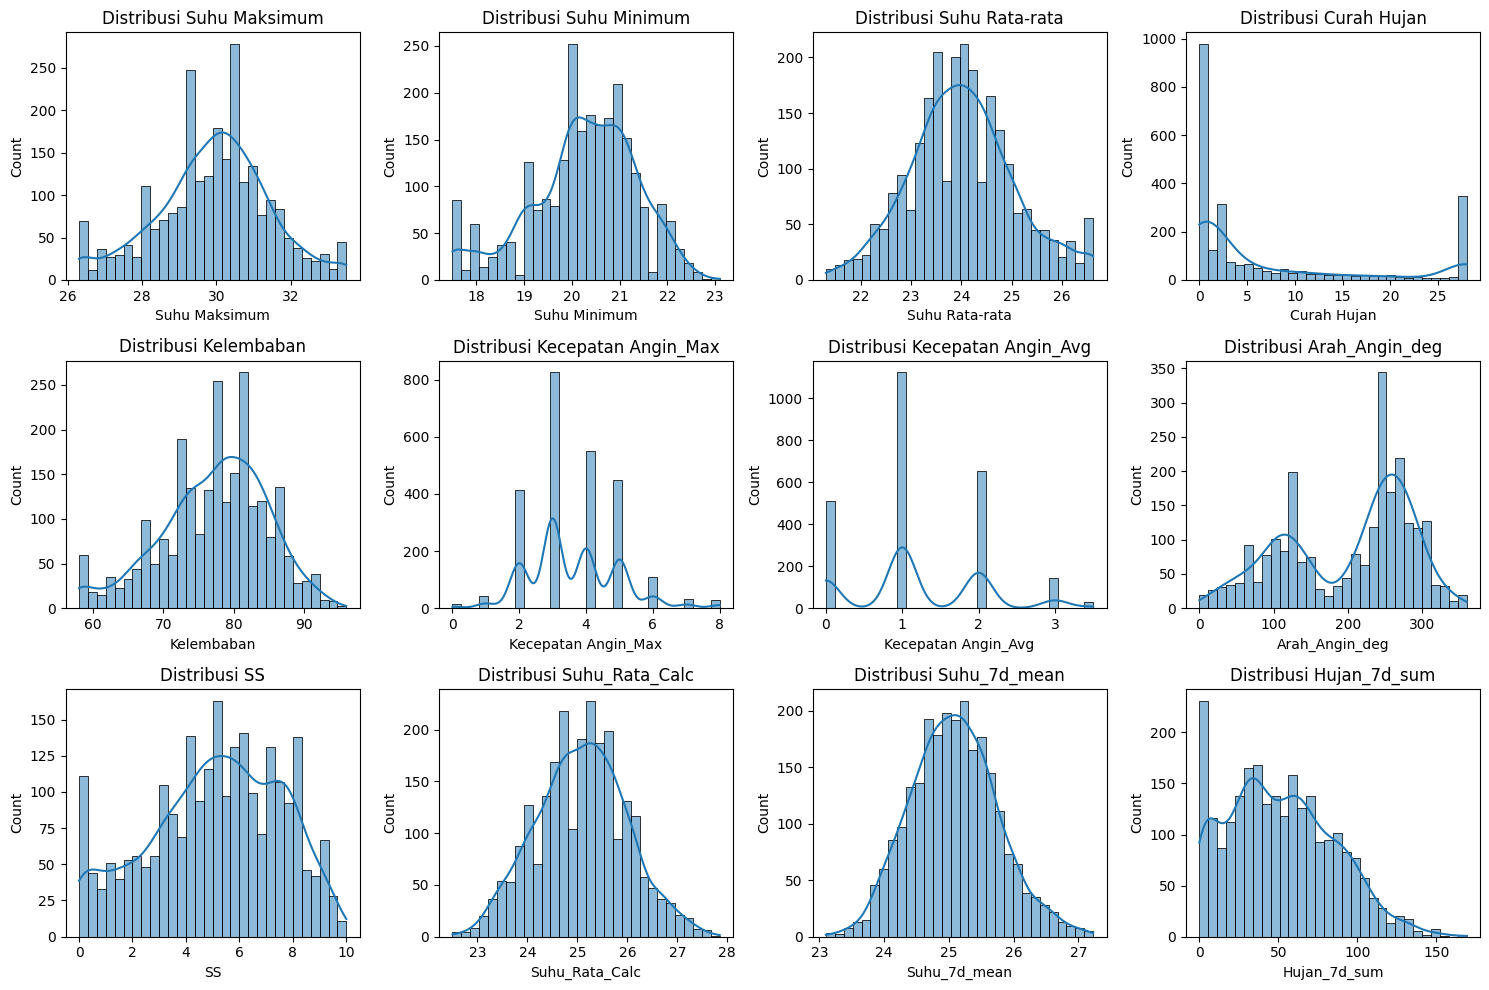

In [ ]:
numeric_cols = ['Suhu Maksimum', 'Suhu Minimum', 'Suhu Rata-rata', 'Curah Hujan', 'Kelembaban', 'Kecepatan Angin_Max', 'Kecepatan Angin_Avg', 'Arah_Angin_deg', 'SS', 'Suhu_Rata_Calc', 'Suhu_7d_mean', 'Hujan_7d_sum']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 4, i) # Adjusted subplot grid
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

**Penjelasan Singkat:**

- Sebagian besar variabel seperti **Suhu Maksimum**, **Suhu Minimum**, **Suhu Rata-rata**, **Kelembaban**, dan **Suhu_7d_mean** memiliki bentuk distribusi **mendekati normal**, menandakan data terdistribusi seimbang.  
- **Curah Hujan** dan **Kecepatan Angin** memiliki distribusi **condong ke kanan (right-skewed)**, artinya sebagian besar nilai rendah namun terdapat beberapa nilai ekstrem tinggi (*outlier*).  
- **Arah Angin** menunjukkan pola **multimodal**, menandakan arah angin bervariasi dan tidak hanya berasal dari satu arah dominan.


### Menampilkan heatmap korelasi antar variabel numerik

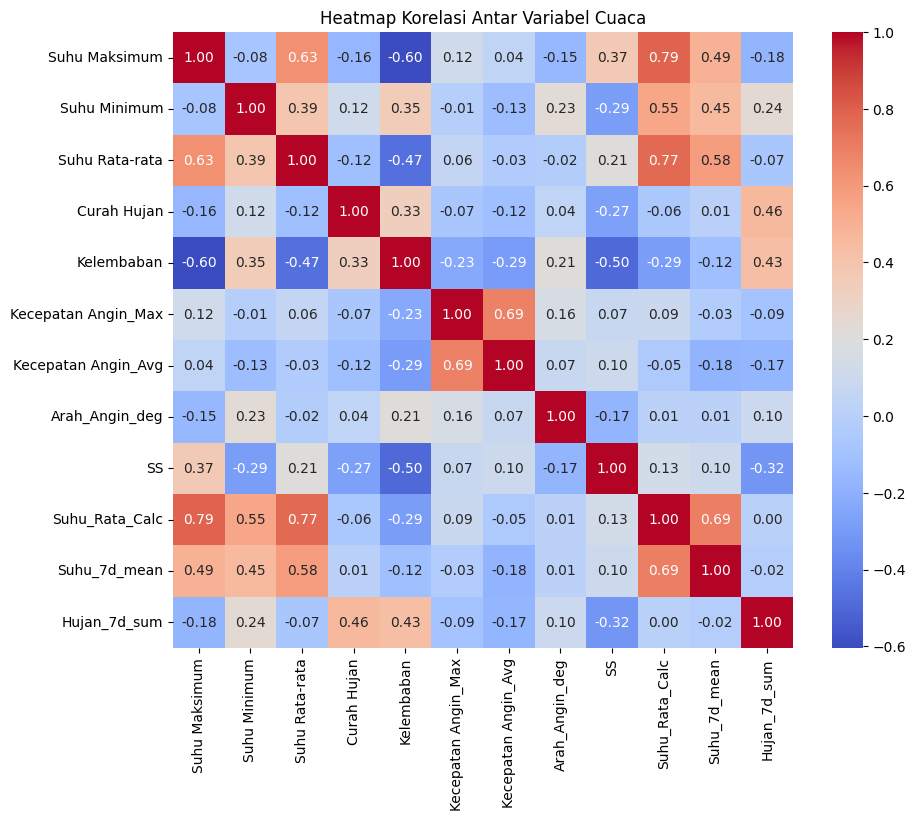

In [ ]:
plt.figure(figsize=(10, 8))
correlation = df[numeric_cols].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi Antar Variabel Cuaca")
plt.show()


### Analisis Korelasi Antar Variabel Cuaca

Terlihat korelasi kuat antara **Suhu Maksimum**, **Suhu Rata-rata**, dan **Suhu_Rata_Calc**, menandakan hubungan positif yang kuat antar variabel suhu.  
**Kelembaban** memiliki korelasi negatif dengan suhu, artinya ketika suhu naik, kelembaban cenderung turun.  
Selain itu, **Kecepatan Angin_Max** dan **Kecepatan Angin_Avg** menunjukkan korelasi positif tinggi, menandakan keduanya saling berkaitan erat.

### Menganalisis tren waktu (time series)

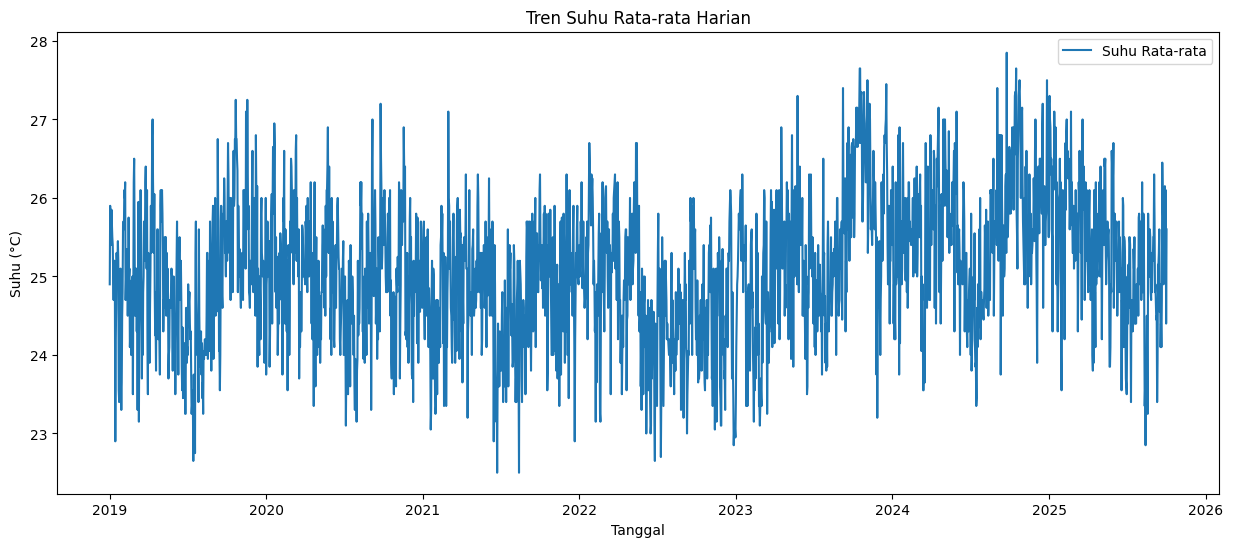

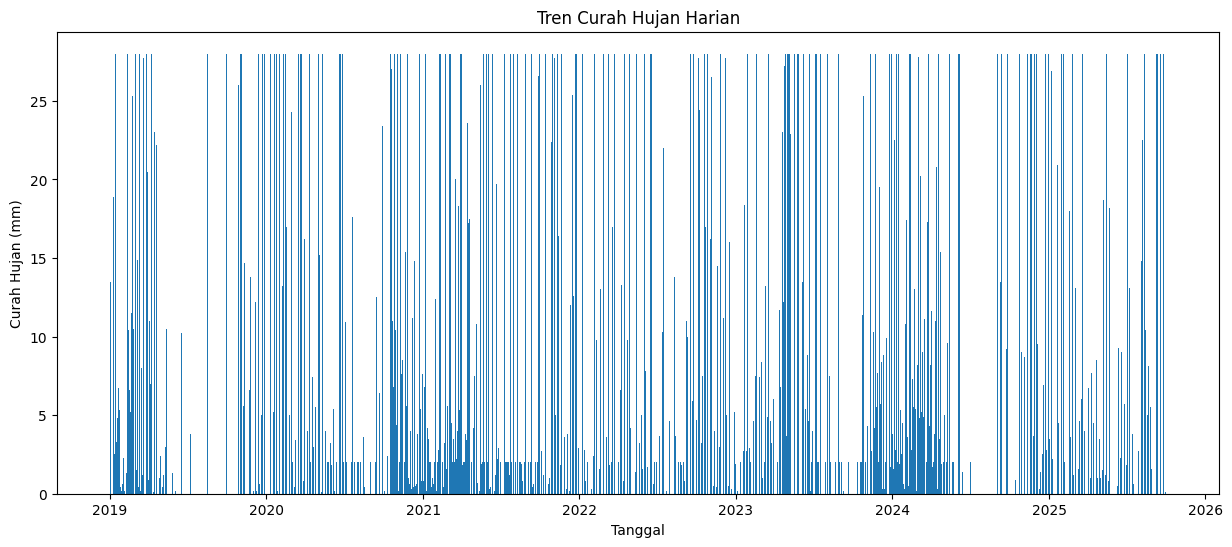

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(pd.to_datetime(df['Tanggal']), df['Suhu_Rata_Calc'], label='Suhu Rata-rata')
plt.ylabel('Suhu (°C)')
plt.xlabel('Tanggal')
plt.title('Tren Suhu Rata-rata Harian')
plt.legend()
plt.show()

plt.figure(figsize=(15,6))
plt.bar(pd.to_datetime(df['Tanggal']), df['Curah Hujan'])
plt.ylabel('Curah Hujan (mm)')
plt.xlabel('Tanggal')
plt.title('Tren Curah Hujan Harian')
plt.show()


### Analisis Tren Suhu dan Curah Hujan

Berdasarkan grafik di atas:

- **Tren Suhu Rata-rata Harian** menunjukkan pola fluktuatif namun relatif stabil di kisaran 23°C–27°C dari tahun 2019 hingga 2025, menandakan variasi suhu yang wajar antar musim.  
- **Tren Curah Hujan Harian** memperlihatkan nilai yang sangat bervariasi dan tidak merata setiap tahun, dengan periode curah hujan tinggi yang menandakan musim hujan dan periode rendah yang menunjukkan musim kemarau.

### Menampilkan hubungan (korelasi visual) antara dua variabel suhu rata-rata dan curah hujan  

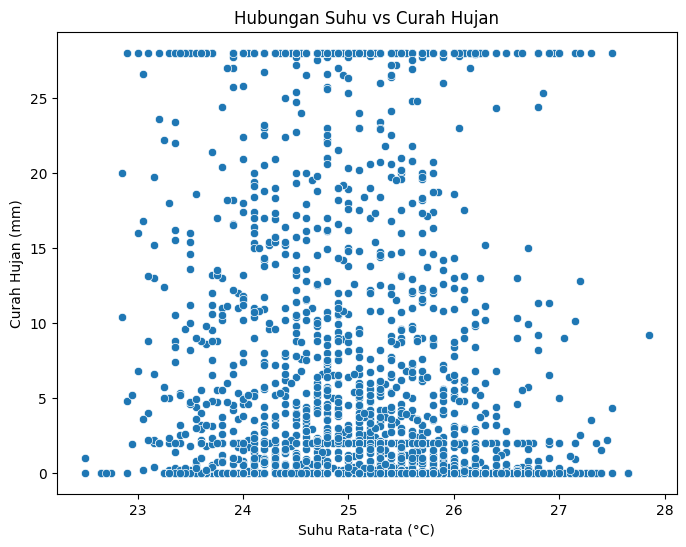

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Suhu_Rata_Calc', y='Curah Hujan', data=df)
plt.title('Hubungan Suhu vs Curah Hujan')
plt.xlabel('Suhu Rata-rata (°C)')
plt.ylabel('Curah Hujan (mm)')
plt.show()


### Analisis Hubungan Suhu vs Curah Hujan

Berdasarkan scatter plot di atas:
- Tidak terlihat hubungan yang kuat antara **suhu rata-rata** dan **curah hujan**.  
- Titik-titik data tersebar acak, menandakan **korelasi lemah atau tidak signifikan** antara kedua variabel.  
- Hal ini menunjukkan bahwa curah hujan di Bandung tidak secara langsung dipengaruhi oleh perubahan suhu harian.


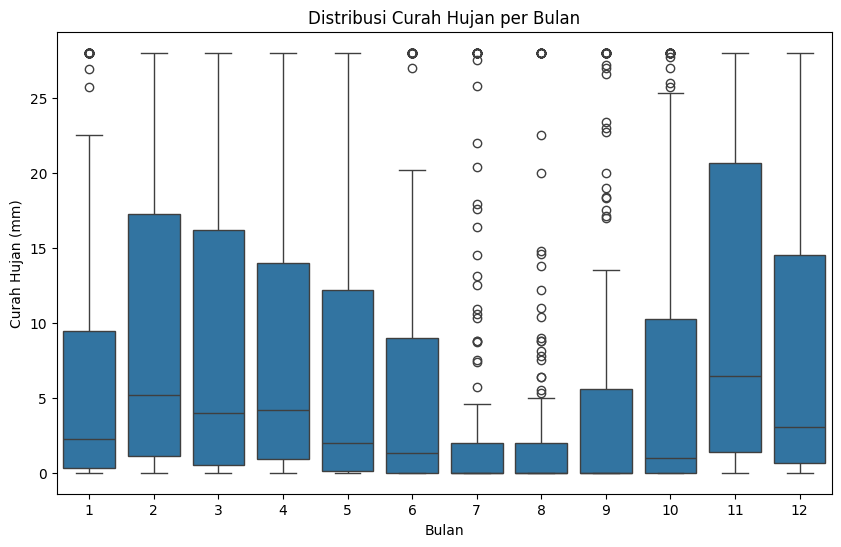

In [ ]:
# Pastikan kolom 'Bulan' ada, jika belum ekstrak dari Tanggal
if 'Bulan' not in df.columns:
    df['Tanggal'] = pd.to_datetime(df['Tanggal'])
    df['Bulan'] = df['Tanggal'].dt.month

plt.figure(figsize=(10,6))
sns.boxplot(x='Bulan', y='Curah Hujan', data=df)
plt.title('Distribusi Curah Hujan per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Curah Hujan (mm)')
plt.show()

### Analisis Distribusi Curah Hujan per Bulan

Dari visualisasi boxplot di atas terlihat bahwa:
- Curah hujan cenderung **lebih tinggi pada bulan Januari, Februari, dan November**, menunjukkan musim hujan.  
- Bulan **Juli hingga September** memiliki curah hujan rendah, menandakan **musim kemarau**.  
- Terdapat beberapa **outlier** di hampir setiap bulan yang menunjukkan kejadian hujan ekstrem.  
Distribusi ini menggambarkan pola iklim musiman khas daerah Bandung.


## Pemodelan dan Evaluasi Model

Pada tahap ini, model Machine Learning dilatih dan dievaluasi untuk memprediksi kategori cuaca. Dua algoritma digunakan:

1. **Logistic Regression**
   - Digunakan sebagai baseline karena cepat dan sederhana.
   - Cocok untuk melihat performa awal pada data linier.

2. **Random Forest Classifier**
   - Digunakan untuk meningkatkan akurasi pada pola data yang kompleks dan non-linear.
    - Dapat memberikan informasi fitur mana yang paling berpengaruh terhadap prediksi.

**Proses yang dilakukan:**
- **Training / Pemodelan**: model dilatih menggunakan data training (`fit()`).
- **Prediksi**: model memprediksi kategori cuaca pada data test (`predict()`).
- **Evaluasi**: performa model dinilai menggunakan metrik:
     - Accuracy
     - Classification Report (Precision, Recall, F1-score)
     - Confusion Matrix (dapat divisualisasikan dengan heatmap untuk mempermudah analisis)

Tahap ini penting untuk memastikan model siap digunakan dalam prediksi cuaca secara akurat.


✅ Dataset berhasil dimuat
      Tanggal Kota/Kabupaten  Suhu Maksimum  Suhu Minimum  Suhu Rata-rata  \
0  2019-01-01        Bandung           28.0          21.8            23.0   
1  2019-01-02        Bandung           31.0          20.8            24.0   
2  2019-01-03        Bandung           30.6          20.7            24.1   
3  2019-01-04        Bandung           30.8          20.0            24.2   
4  2019-01-05        Bandung           31.7          20.0            24.8   

   Curah Hujan  Kelembaban  Kecepatan Angin_Max  Kecepatan Angin_Avg  \
0          0.0        79.0                  3.0                  2.0   
1         13.5        74.0                  8.0                  3.5   
2          0.8        76.0                  7.0                  3.5   
3          0.0        69.0                  5.0                  3.0   
4          0.0        70.0                  5.0                  3.0   

   Arah_Angin_deg  ...   SS  Suhu_Rata_Calc  Is_Rain       Hari Bulan  Tahun  

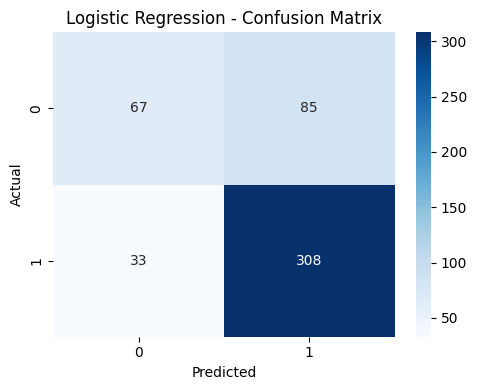


🌲=== Random Forest ===
Accuracy: 0.742393509127789
              precision    recall  f1-score   support

           0       0.62      0.42      0.50       152
           1       0.77      0.89      0.83       341

    accuracy                           0.74       493
   macro avg       0.70      0.65      0.66       493
weighted avg       0.73      0.74      0.73       493



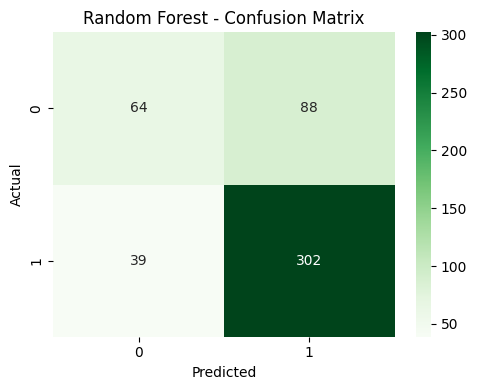


📈 Perbandingan Akurasi:
Logistic Regression : 0.7606
Random Forest       : 0.7424
✅ Logistic Regression lebih baik untuk data ini.


In [ ]:
#  1. Import Library

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#  2. Load Dataset

df = pd.read_csv('/content/cuaca_bandung_mapped_feature_engineered.csv')

print("✅ Dataset berhasil dimuat")
print(df.head())

#  3. Cek Kolom Target

if 'Hujan' not in df.columns:
    if 'Curah Hujan' in df.columns:
        df['Hujan'] = (df['Curah Hujan'] > 0).astype(int)
        print("✅ Kolom target 'Hujan' berhasil dibuat (1 = Hujan, 0 = Tidak Hujan)")
    else:
        raise ValueError("❌ Kolom 'Curah Hujan' tidak ditemukan di dataset.")
else:
    print("✅ Kolom 'Hujan' sudah tersedia di dataset.")

#  4. Pisahkan Fitur dan Target

numeric_cols = ['Suhu Maksimum', 'Suhu Minimum', 'Suhu Rata-rata', 'Kelembaban', 'Kecepatan Angin_Max', 'Kecepatan Angin_Avg', 'Arah_Angin_deg']
X = df[numeric_cols]
y = df['Hujan']

#  5. Split Dataset (Train/Test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("✅ Data berhasil di-split menjadi train dan test set")

#  6. Normalisasi Data

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# MODEL 1: Logistic Regression

log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)

print("\n📊=== Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# MODEL 2: Random Forest

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\n🌲=== Random Forest ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Perbandingan Akurasi

acc_log = accuracy_score(y_test, y_pred_log)
acc_rf = accuracy_score(y_test, y_pred_rf)

print("\n📈 Perbandingan Akurasi:")
print(f"Logistic Regression : {acc_log:.4f}")
print(f"Random Forest       : {acc_rf:.4f}")

if acc_rf > acc_log:
    print("✅ Random Forest lebih baik untuk data ini.")
else:
    print("✅ Logistic Regression lebih baik untuk data ini.")

##  Hasil Evaluasi Model

###  1. Logistic Regression
- **Akurasi:** 0.7606  
- **Precision (Kelas Hujan):** 0.78  
- **Recall (Kelas Hujan):** 0.90  
- **F1-score:** 0.84  

**Interpretasi:**  
Model *Logistic Regression* cukup baik dalam mengenali hari yang **hujan (kelas 1)**.  
Dari confusion matrix:
- 308 data hujan terprediksi benar sebagai hujan  
- 33 data hujan salah diklasifikasi sebagai tidak hujan  
- 67 data tidak hujan terprediksi benar sebagai tidak hujan  
- 85 data tidak hujan salah diklasifikasi sebagai hujan  

Artinya model ini **lebih sensitif terhadap hujan (recall tinggi)**, yang baik untuk sistem **peringatan dini cuaca**.

---

###  2. Random Forest
- **Akurasi:** 0.7424  
- **Precision (Kelas Hujan):** 0.77  
- **Recall (Kelas Hujan):** 0.89  
- **F1-score:** 0.83  

**Interpretasi:**  
Model *Random Forest* juga mampu mengenali hari hujan dengan baik, namun akurasinya **sedikit lebih rendah** dibanding Logistic Regression.  
Dari confusion matrix:
- 302 data hujan terprediksi benar sebagai hujan  
- 39 data hujan salah diklasifikasi  
- 64 data tidak hujan benar  
- 88 data tidak hujan salah diklasifikasi  

Model ini juga cukup kuat, tetapi menghasilkan **lebih banyak false positive** (hari tidak hujan diprediksi hujan).

---

### Kesimpulan Akhir

| Model | Akurasi | Kelebihan | Kekurangan |
|:--|:--:|:--|:--|
| **Logistic Regression** | 0.7606 | Stabil, cepat, akurasi terbaik | Kurang menangani data non-linear |
| **Random Forest** | 0.7424 | Lebih kompleks, bisa tangani data non-linear | Akurasi sedikit lebih rendah |


### Cara Mandingkan performa Logistic Regression dan Random Forest dengan teknik 5-Fold Cross Validation.

📈 Cross-Validation (5-Fold) Accuracy Comparison
Logistic Regression : 0.7496 ± 0.0463
Random Forest       : 0.7342 ± 0.0302


/tmp/ipython-input-3557194489.py:32: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([scores_lr, scores_rf], labels=['Logistic Regression', 'Random Forest'])


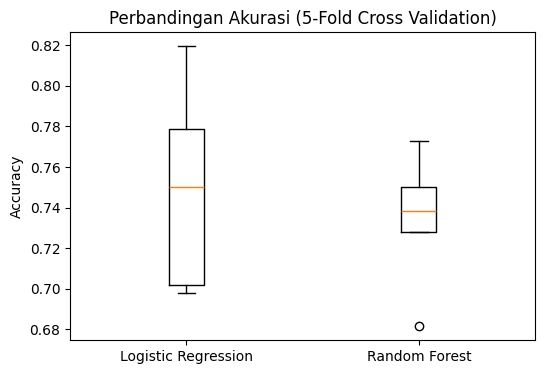

In [ ]:
# =========================
# 📊  Cross Validation Comparison
# =========================
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler # Import StandardScaler

# Normalisasi seluruh dataset fitur X sebelum cross-validation
# Gunakan scaler yang sudah dilatih (fitur dari EEYProxtx4sL)
scaler_full = StandardScaler()
X_scaled = scaler_full.fit_transform(X)


# Logistic Regression
log_reg_cv = LogisticRegression(max_iter=1000, random_state=42)
scores_lr = cross_val_score(log_reg_cv, X_scaled, y, cv=5, scoring='accuracy')

# Random Forest
# Random Forest umumnya tidak memerlukan scaling, tapi untuk perbandingan yang adil dengan LR pada data yang sama,
# kita akan tetap menggunakan X_scaled. Atau bisa juga menggunakan X asli.
# Jika ingin menggunakan X asli: scores_rf = cross_val_score(rf_cv, X, y, cv=5, scoring='accuracy')
rf_cv = RandomForestClassifier(n_estimators=100, random_state=42)
scores_rf = cross_val_score(rf_cv, X_scaled, y, cv=5, scoring='accuracy')


# Hasil rata-rata cross-validation
print("📈 Cross-Validation (5-Fold) Accuracy Comparison")
print(f"Logistic Regression : {scores_lr.mean():.4f} ± {scores_lr.std():.4f}")
print(f"Random Forest       : {scores_rf.mean():.4f} ± {scores_rf.std():.4f}")

# Visualisasi perbandingan skor
plt.figure(figsize=(6,4))
plt.boxplot([scores_lr, scores_rf], labels=['Logistic Regression', 'Random Forest'])
plt.title("Perbandingan Akurasi (5-Fold Cross Validation)")
plt.ylabel("Accuracy")
plt.show()

#  Evaluasi Model dengan Cross Validation (5-Fold)

## Hasil Perbandingan
| Model | Rata-rata Akurasi | Deviasi Standar | Keterangan |
|:------|:------------------:|:----------------:|:------------|
| **Logistic Regression** | 0.7496 | ± 0.0463 | Akurasi tertinggi, sedikit fluktuatif antar fold |
| **Random Forest** | 0.7342 | ± 0.0302 | Stabil tetapi akurasi sedikit lebih rendah |

---

##  Interpretasi Boxplot

- **Sumbu Y (Accuracy):** menunjukkan nilai akurasi pada tiap fold.  
- **Kotak (Box):** menggambarkan rentang nilai akurasi antar fold (interquartile range).  
- **Garis di tengah box:** nilai median akurasi.  
- **Whisker dan titik luar:** menunjukkan sebaran nilai minimum, maksimum, serta outlier.

###  Penjelasan Visual:
- **Logistic Regression** → memiliki akurasi median lebih tinggi (~0.76–0.78) dengan sedikit variasi antar fold.  
- **Random Forest** → lebih konsisten (boxplot lebih sempit) namun akurasinya sedikit lebih rendah (~0.73–0.75).  

---

##  Kesimpulan Akhir

| Model | Akurasi | Stabilitas | Kesimpulan |
|:------|:---------:|:------------:|:------------|
| **Logistic Regression** |  0.7496 | Sedikit bervariasi antar fold |  **Model terbaik untuk dataset ini** |
| **Random Forest** | 0.7342 | Lebih stabil tapi kurang akurat | Cocok untuk data besar dan non-linear |

> **Kesimpulan:** Logistic Regression masih unggul dalam prediksi cuaca berdasarkan data yang digunakan.  
> Random Forest tetap kompetitif namun belum mengungguli akurasi rata-rata Logistic Regression.


### Menyimpan model machine learning yang sudah dilatih

In [ ]:
import joblib

# 📌 1. Tentukan model terbaik (misal Random Forest)
best_model = rf_model  # Kalau logistic regression lebih bagus, ganti ke logreg

# 📌 2. Simpan model dan scaler ke file
joblib.dump(best_model, "model_prediksi_hujan.pkl")
joblib.dump(scaler, "scaler.pkl")

print("✅ Model dan Scaler berhasil disimpan sebagai file .pkl")

✅ Model dan Scaler berhasil disimpan sebagai file .pkl


### Contoh Prediksi

In [ ]:
# ✅ Contoh prediksi baru
# Input: [TN, TX, TAVG, RH_AVG, FF_X, FF_AVG, DDD_X]
sample = [[21.5, 30.2, 25.6, 85, 15, 5, 180]]  # contoh data Bandung

# Load scaler dan model
loaded_scaler = joblib.load("scaler.pkl")
loaded_model = joblib.load("model_prediksi_hujan.pkl")

# Transform & prediksi
sample_scaled = loaded_scaler.transform(sample)
pred = loaded_model.predict(sample_scaled)

if pred[0] == 1:
    print("🌧 Prediksi: HUJAN")
else:
    print("☀️ Prediksi: TIDAK HUJAN")

☀️ Prediksi: TIDAK HUJAN


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
!pip install streamlit joblib pandas matplotlib seaborn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 97.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 130.5 MB/s eta 0:00:00


In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib
import plotly.express as px
from datetime import datetime

# === Konfigurasi Dashboard ===
st.set_page_config(
    page_title="🌦️ Dashboard Cuaca Bandung",
    layout="wide",
    page_icon="🌤️"
)

# 🌈 --- Styling Custom CSS ---
st.markdown("""
    <style>
        .stApp {
            background: linear-gradient(135deg, #E0F7FA 0%, #80DEEA 100%);
        }
        h1, h2, h3, h4 {
            color: #004D40;
            font-family: 'Segoe UI', sans-serif;
        }
        .metric-box {
            background: white;
            padding: 15px;
            border-radius: 15px;
            box-shadow: 0px 3px 10px rgba(0,0,0,0.1);
            text-align: center;
        }
        .footer {
            text-align: center;
            padding: 10px;
            font-size: 0.85em;
            color: #004D40;
        }
    </style>
""", unsafe_allow_html=True)

# === Load Dataset ===
@st.cache_data
def load_data():
    # Mengganti nama file sesuai dengan hasil preprocessing
    df = pd.read_csv("cuaca_bandung_mapped_feature_engineered.csv")
    df['Tanggal'] = pd.to_datetime(df['Tanggal'])
    return df

try:
    df = load_data()
except FileNotFoundError:
    st.error("❌ File `cuaca_bandung_mapped_feature_engineered.csv` tidak ditemukan. Pastikan file ada di folder yang sama.")
    st.stop()

# === Load Model dan Scaler ===
@st.cache_resource
def load_model():
    try:
        model = joblib.load("model_prediksi_hujan.pkl")
        scaler = joblib.load("scaler.pkl")
        return model, scaler
    except:
        # Mengembalikan None jika file model atau scaler tidak ditemukan
        return None, None

model, scaler = load_model()

# === SIDEBAR ===
st.sidebar.title("🔧 Pengaturan Dashboard")
st.sidebar.markdown("Gunakan filter berikut untuk menyesuaikan tampilan data:")

# Filter Tahun
tahun_list = sorted(df['Tahun'].unique())
tahun = st.sidebar.selectbox("Pilih Tahun", tahun_list)

# Filter Bulan
bulan_list = sorted(df['Bulan'].unique())
bulan = st.sidebar.multiselect("Pilih Bulan", bulan_list, default=[])

# Terapkan Filter
df_filtered = df[df['Tahun'] == tahun]
if bulan:
    df_filtered = df_filtered[df_filtered['Bulan'].isin(bulan)]

# === HEADER ===
st.title("🌦️ Dashboard Analitik & Prediksi Cuaca — Bandung")
st.markdown("> Dashboard ini menyajikan **analisis data historis cuaca** dan **prediksi hujan** di Kota Bandung secara interaktif ☔")

# === Tabs Navigasi ===
tab1, tab2, tab3 = st.tabs(["📌 Ringkasan", "📈 Visualisasi", "🤖 Prediksi"])

# === TAB 1: RINGKASAN ===
with tab1:
    st.subheader("📌 Ringkasan Data Cuaca")

    if not df_filtered.empty:
        # Menampilkan Metrik Cuaca Rata-rata
        col1, col2, col3, col4 = st.columns(4)
        col1.markdown(f"<div class='metric-box'><h4>🌡️ Suhu Rata-rata</h4><h2>{df_filtered['Suhu Rata-rata'].mean():.1f} °C</h2></div>", unsafe_allow_html=True)
        col2.markdown(f"<div class='metric-box'><h4>🔥 Suhu Maksimum</h4><h2>{df_filtered['Suhu Maksimum'].mean():.1f} °C</h2></div>", unsafe_allow_html=True)
        col3.markdown(f"<div class='metric-box'><h4>❄️ Suhu Minimum</h4><h2>{df_filtered['Suhu Minimum'].mean():.1f} °C</h2></div>", unsafe_allow_html=True)
        col4.markdown(f"<div class='metric-box'><h4>🌧️ Curah Hujan</h4><h2>{df_filtered['Curah Hujan'].mean():.1f} mm</h2></div>", unsafe_allow_html=True)

        st.markdown("### 📝 Contoh Data")
        st.dataframe(df_filtered.head(10), use_container_width=True)
    else:
        st.warning("⚠️ Tidak ada data untuk filter yang dipilih.")

# === TAB 2: VISUALISASI ===
with tab2:
    st.subheader("📊 Tren Cuaca")

    if not df_filtered.empty:
        # Grafik Tren Suhu & Curah Hujan
        fig_trend = px.line(
            df_filtered,
            x='Tanggal',
            y=['Suhu Rata-rata', 'Curah Hujan'],
            labels={'value': 'Nilai', 'variable': 'Parameter'},
            title="📈 Grafik Suhu & Curah Hujan"
        )
        fig_trend.update_layout(legend_title_text='Parameter', template='plotly_white')
        st.plotly_chart(fig_trend, use_container_width=True)

        # Korelasi Variabel Cuaca Numerik
        st.subheader("🔍 Korelasi Variabel Cuaca")
        numeric_cols = ['Suhu Maksimum', 'Suhu Minimum', 'Suhu Rata-rata',
                        'Curah Hujan', 'Kelembaban', 'Kecepatan Angin_Max',
                        'Kecepatan Angin_Avg']
        corr = df_filtered[numeric_cols].corr()
        fig_corr = px.imshow(corr, text_auto=True, aspect="auto", title="Heatmap Korelasi Cuaca")
        st.plotly_chart(fig_corr, use_container_width=True)
    else:
        st.warning("⚠️ Tidak ada data untuk filter yang dipilih.")

# === TAB 3: PREDIKSI ===
with tab3:
    st.subheader("🤖 Prediksi Hujan / Tidak Hujan")

    if model is not None and scaler is not None:
        st.info("Masukkan parameter cuaca untuk melakukan prediksi:")
        col1, col2, col3 = st.columns(3)

        # Input untuk Prediksi
        suhu_min = col1.number_input("Suhu Minimum (°C)", value=22.0)
        suhu_max = col2.number_input("Suhu Maksimum (°C)", value=30.0)
        suhu_avg = col3.number_input("Suhu Rata-rata (°C)", value=25.0)

        kelembaban = col1.number_input("Kelembaban (%)", value=75.0)
        angin_max = col2.number_input("Kecepatan Angin Maks (m/s)", value=5.0)
        angin_avg = col3.number_input("Kecepatan Angin Rata-rata (m/s)", value=3.0)
        arah_angin = col1.number_input("Arah Angin (°)", value=250.0)

        if st.button("🚀 Prediksi"):
            try:
                # Siapkan data input sesuai urutan fitur yang digunakan saat training
                input_data = [[suhu_min, suhu_max, suhu_avg, kelembaban, angin_max, angin_avg, arah_angin]]
                input_scaled = scaler.transform(input_data)
                pred = model.predict(input_scaled)[0]
                # Ambil probabilitas untuk kelas positif (Hujan = 1)
                prob = model.predict_proba(input_scaled)[0][1]

                if pred == 1:
                    st.success(f"🌧 **Prediksi: HUJAN** (Probabilitas {prob*100:.1f}%)")
                else:
                    st.info(f"☀️ **Prediksi: TIDAK HUJAN** (Probabilitas {prob*100:.1f}%)")
            except Exception as e:
                st.error(f"Terjadi kesalahan saat prediksi: {e}")
    else:
        st.warning("⚠️ Model prediksi atau scaler belum tersedia. Silakan upload file model (`.pkl`) dan scaler:")

        # Bagian untuk Upload Model
        uploaded_model = st.file_uploader("📤 Upload Model Prediksi (.pkl)", type=["pkl"])
        uploaded_scaler = st.file_uploader("📤 Upload Scaler (.pkl)", type=["pkl"])

        if uploaded_model and uploaded_scaler:
            try:
                with open("model_prediksi_hujan.pkl", "wb") as f:
                    f.write(uploaded_model.getbuffer())
                with open("scaler.pkl", "wb") as f:
                    f.write(uploaded_scaler.getbuffer())
                st.success("✅ Model & Scaler berhasil diupload. Silakan refresh halaman.")
            except Exception as e:
                 st.error(f"Terjadi kesalahan saat menyimpan file: {e}")


# === Footer ===
st.markdown("<div class='footer'>✨ Dashboard Cuaca Bandung — dibuat dengan ❤️ dan Streamlit</div>", unsafe_allow_html=True)

Writing app.py


In [ ]:
!pkill streamlit

In [ ]:
!pip install pyngrok
!ngrok authtoken "34KnssPo2NGWxkCqv671hffn2DF_7F3NxUWJn5gCmzBwJeLN2"


In [ ]:
import pandas as pd

df = pd.read_csv("cuaca_bandung_mapped_cleaned.csv")
print(df.columns.tolist())


In [ ]:
from pyngrok import ngrok
public_url = ngrok.connect(8501)
print("🌍 URL Akses Aplikasi:", public_url)
!streamlit run app.py --server.port 8501 > /dev/null

KeyboardInterrupt: 

In [ ]:
from pyngrok import ngrok
# Stop any ngrok processes currently running
ngrok.kill()
public_url = ngrok.connect(8501)
print(public_url)
!streamlit run app.py &>/dev/null&

PyngrokNgrokInstallError: An error occurred while downloading ngrok from https://bin.equinox.io/c/bNyj1mQVY4c/ngrok-v3-stable-linux-amd64.zip: <urlopen error _ssl.c:993: The handshake operation timed out>

In [ ]:
!streamlit run app.py & npx localtunnel --port 8501


In [ ]:
!npm install -g localtunnel
!streamlit run app.py & npx localtunnel --port 8501

In [ ]:
!streamlit run app.py

In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

In [ ]:
!curl https://loca.lt/mytunnelpassword


34.86.218.0

In [ ]:
import pandas as pd

df = pd.read_csv("/content/cuaca_bandung_mapped_feature_engineered.csv")
print("Kolom dataset:", df.columns.tolist())
print(df.head(5))


In [ ]:
!wget https://bin.equinox.io/c/bNyj1mQVY4c/ngrok-v3-stable-linux-amd64.zip
!unzip -o ngrok-v3-stable-linux-amd64.zip
!./ngrok authtoken "34KnssPo2NGWxkCqv671hffn2DF_7F3NxUWJn5gCmzBwJeLN2"


--2025-10-20 15:20:14--  https://bin.equinox.io/c/bNyj1mQVY4c/ngrok-v3-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 75.2.60.68, 99.83.220.108, 35.71.179.82, ...
Connecting to bin.equinox.io (bin.equinox.io)|75.2.60.68|:443... connected.
Unable to establish SSL connection.
unzip:  cannot find or open ngrok-v3-stable-linux-amd64.zip, ngrok-v3-stable-linux-amd64.zip.zip or ngrok-v3-stable-linux-amd64.zip.ZIP.
/bin/bash: line 1: ./ngrok: No such file or directory
